# Lab: Titanic EDA
This week was all about Pandas and plotting. At this point you should be chomping at the bit to get your hands dirty on a real-world dataset.

For this lab, we're going to take a look at the Titanic manifest. We'll be exploring this data to see what we can learn regarding the survival rates of different groups of people.

### Dataset Info 
#### Data Dictionary

|Variable|Definition|Key|
|---|---|---|
|survival|Survival|0 = No, 1 = Yes
pclass|Ticket class|1 = 1st, 2 = 2nd, 3 = 3rd
|sex|Sex| |	
|Age|Age in years| |	
|sibsp|# of siblings / spouses aboard the Titanic| |
|parch|# of parents / children aboard the Titanic| |	
|ticket|Ticket number| |
|fare|Passenger fare| |
|cabin|Cabin number| |
|embarked|Port of Embarkation|C = Cherbourg, Q = Queenstown, S = Southampton

#### Variable Notes
pclass: A proxy for socio-economic status (SES)
<p>1st = Upper 2nd = Middle 3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
<p>Sibling = brother, sister, stepbrother, stepsister</p>
<p>Spouse = husband, wife (mistresses and fiancés were ignored)</p>

parch: The dataset defines family relations in this way...
<p>Parent = mother, father</p>
<p>Child = daughter, son, stepdaughter, stepson</p>
<p>Some children travelled only with a nanny, therefore parch=0 for them.</p>

[Titanic Kaggle competition](https://www.kaggle.com/c/titanic/data) Refer to the Titanic Kaggle competition

### Setup Cell

In [1]:
# Import library and load dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Read in the CSV file into a Pandas Dataframe.
df = pd.read_csv('./train.csv')

### Explore and Cleaning Data

2. Which column has the most `NaN` values? How many cells in that column are empty?
3. Delete all rows where `Embarked` is empty
4. Fill all empty cabins with **¯\\_(ツ)_/¯**



In [2]:
# Check the shape of the data
df.shape

(891, 12)

In [3]:
# Check the columns of the data
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
# Check infomation in each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Check the head, tail, and look at a sample...
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
# Check an inappropriate value of numbers
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# Drop the 'PassengerId' column because not use in analysis
df.drop("PassengerId", axis=1, inplace=True)

In [9]:
# Check columns again to verify the drop PassengerId' column
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### 1. Create a bar chart showing how many missing values are in each column

In [10]:
# Check NaN
df.isnull().sum()[df.isnull().sum() !=0].sort_values(ascending = False)

Cabin       687
Age         177
Embarked      2
dtype: int64

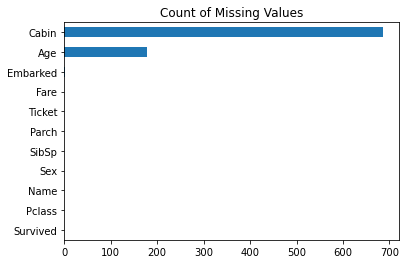

In [11]:
# Bar chart showing how many missing values are in each column
fig, ax = plt.subplots()
df.isnull().sum().sort_values(ascending=True).plot.barh();
plt.title('Count of Missing Values');

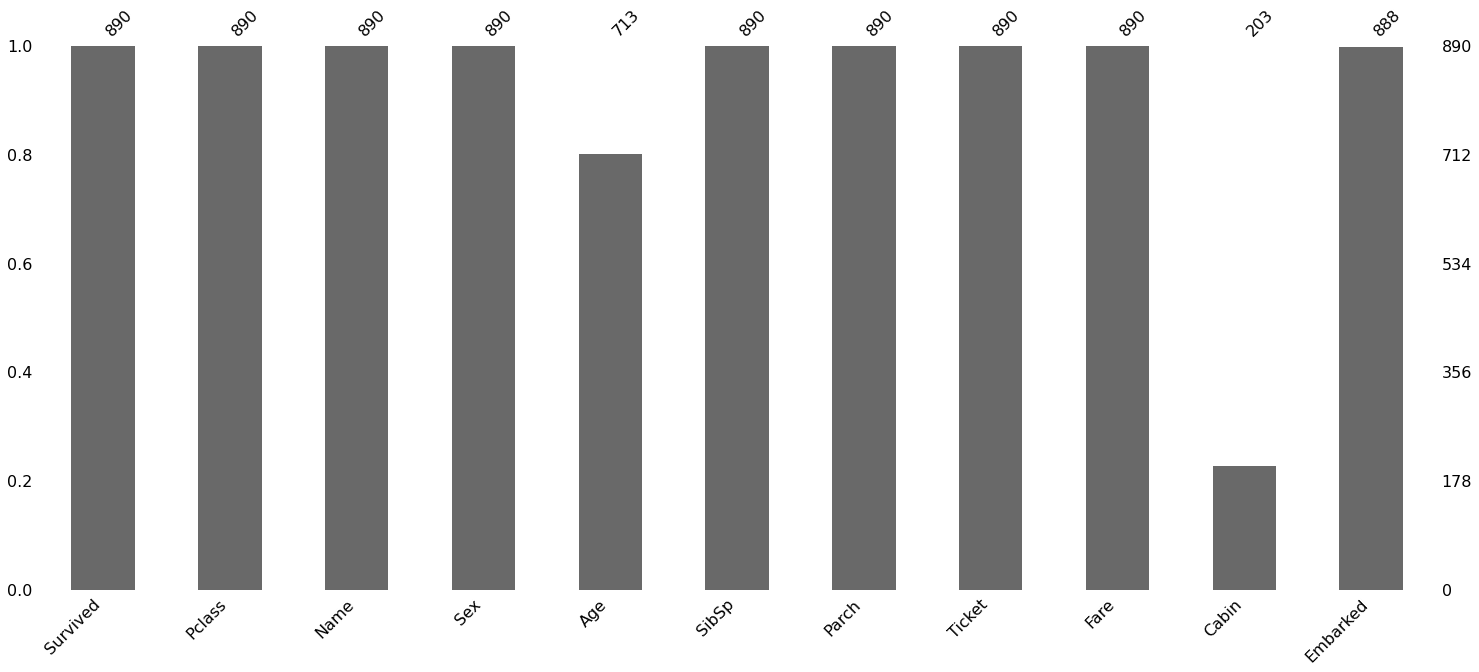

In [12]:
msno.bar(df.sample(890));

### Which column has the most NaN values? How many cells in that column are empty
     Cabin: 687 Nan

### Delete all rows where Embarked is empty

In [13]:
# check % of missing value
round(df.isnull().mean()*100,2).sort_values(ascending = False)

Cabin       77.10
Age         19.87
Embarked     0.22
Survived     0.00
Pclass       0.00
Name         0.00
Sex          0.00
SibSp        0.00
Parch        0.00
Ticket       0.00
Fare         0.00
dtype: float64

Due to % of missing values in Embarked column have below 5%, I decide to delete it.

In [14]:
# Delete NaN in columns "Embarked"
df = df[df['Embarked'].notna()]

In [15]:
# Recheck
df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [16]:
# Recheck NaN values again
df.isnull().sum()[df.isnull().sum() !=0].sort_values(ascending = False)

Cabin    687
Age      177
dtype: int64

### Fill all empty cabins with ¯\(ツ)/¯

In [17]:
# fill ¯\(ツ)/¯ values in Nan values in columns "Cabin"
df['Cabin'].fillna('¯\(ツ)/¯', inplace=True)

In [18]:
# Recheck
df.isnull().sum()[df.isnull().sum() !=0].sort_values(ascending = False)

Age    177
dtype: int64

### Step 3: Feature extraction

#### 1.There are two columns that pertain to how many family members are on the boat for a given person. Create a new column called FamilyCount which will be the sum of those two columns.

In [19]:
# Check Parch and SibSp columns 
df[['Parch', 'SibSp']]

,Parch,SibSp
0,0,1
1,0,1
2,0,0
3,0,1
4,0,0
...,...,...
886,0,0
887,0,0
888,2,1
889,0,0


In [20]:
# Create FamilyCount columns is sum of Parch and SibSp columns
df['FamilyCount'] = df['Parch'] + df['SibSp']

In [21]:
# Recheck
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0


#### 2.Reverends have a special title in their name. Create a column called IsReverend: 1 if they're a preacher, 0 if they're not.

In [22]:
# filter Reverends have a special title(Rev.) in Name column
df[df['Name'].str.contains('Rev.')]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount
149,0,2,"Byles, Rev. Thomas Roussel Davids",male,42.0,0,0,244310,13.000,¯\(ツ)/¯,S,0
150,0,2,"Bateman, Rev. Robert James",male,51.0,0,0,S.O.P. 1166,12.525,¯\(ツ)/¯,S,0
249,0,2,"Carter, Rev. Ernest Courtenay",male,54.0,1,0,244252,26.000,¯\(ツ)/¯,S,1
626,0,2,"Kirkland, Rev. Charles Leonard",male,57.0,0,0,219533,12.350,¯\(ツ)/¯,Q,0
848,0,2,"Harper, Rev. John",male,28.0,0,1,248727,33.000,¯\(ツ)/¯,S,1
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000,¯\(ツ)/¯,S,0


In [23]:
# Create a column IsReverend: 1 = have Rev. in Name columns
# 0 if are not.
df['IsReverend'] = df['Name'].str.contains('Rev.').map(lambda x: int(x))

In [24]:
# Recheck
df[df['Name'].str.contains('Rev.')]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend
149,0,2,"Byles, Rev. Thomas Roussel Davids",male,42.0,0,0,244310,13.000,¯\(ツ)/¯,S,0,1
150,0,2,"Bateman, Rev. Robert James",male,51.0,0,0,S.O.P. 1166,12.525,¯\(ツ)/¯,S,0,1
249,0,2,"Carter, Rev. Ernest Courtenay",male,54.0,1,0,244252,26.000,¯\(ツ)/¯,S,1,1
626,0,2,"Kirkland, Rev. Charles Leonard",male,57.0,0,0,219533,12.350,¯\(ツ)/¯,Q,0,1
848,0,2,"Harper, Rev. John",male,28.0,0,1,248727,33.000,¯\(ツ)/¯,S,1,1
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000,¯\(ツ)/¯,S,0,1


### 3.In order to feed our training data into a classification algorithm, we need to convert our categories into 1's and 0's using pd.get_dummies
* Familiarize yourself with the pd.get_dummies documentation
* Create 3 columns: Embarked_C, Embarked_Q and Embarked_S. These columns will have 1's and 0's that correspond to the C, Q and S values in the Embarked column
* Do the same thing for Sex
* BONUS: Extract the title from everyone's name and create dummy columns

In [25]:
# Used pd.get_dummies()
# Create 3 columns: Embarked_C, Embarked_Q and Embarked_S
# Add 1's and 0's that correspond to the C, Q and S values 
# in the Embarked column
df = pd.get_dummies(df, columns=['Embarked'])
# Recheck
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,1,0,0,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,0,0,0,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,1,0,0,0,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,0,0,0,0,1


In [26]:
# Check values in Sex column
df["Sex"].value_counts()

male      577
female    312
Name: Sex, dtype: int64

In [27]:
# Create IsMale column
# Add 1's == male and 0's == female in the Sex column
df['IsMale'] = df['Sex'].map(lambda x: 1 if x == 'male' else 0)

In [28]:
# Recheck
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S,IsMale
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,1,0,0,0,1,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,0,0,0,0,1,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,1,0,0,0,1,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,0,0,0,0,1,1


In [29]:
# Delete column not used
df.drop('Sex', axis=1, inplace=True)

In [30]:
# Recheck
df.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S,IsMale
0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,1,0,0,0,1,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0,0
2,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,0,0,0,0,1,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,0,1,0
4,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,¯\(ツ)/¯,0,0,0,0,1,1


##### BONUS: Extract the title from everyone's name and create dummy columns

In [31]:
# Check values in Name column
for title in df['Name']:
    print(title)

Braund, Mr. Owen Harris
Cumings, Mrs. John Bradley (Florence Briggs Thayer)
Heikkinen, Miss. Laina
Futrelle, Mrs. Jacques Heath (Lily May Peel)
Allen, Mr. William Henry
Moran, Mr. James
McCarthy, Mr. Timothy J
Palsson, Master. Gosta Leonard
Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
Nasser, Mrs. Nicholas (Adele Achem)
Sandstrom, Miss. Marguerite Rut
Bonnell, Miss. Elizabeth
Saundercock, Mr. William Henry
Andersson, Mr. Anders Johan
Vestrom, Miss. Hulda Amanda Adolfina
Hewlett, Mrs. (Mary D Kingcome) 
Rice, Master. Eugene
Williams, Mr. Charles Eugene
Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)
Masselmani, Mrs. Fatima
Fynney, Mr. Joseph J
Beesley, Mr. Lawrence
McGowan, Miss. Anna "Annie"
Sloper, Mr. William Thompson
Palsson, Miss. Torborg Danira
Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)
Emir, Mr. Farred Chehab
Fortune, Mr. Charles Alexander
O'Dwyer, Miss. Ellen "Nellie"
Todoroff, Mr. Lalio
Uruchurtu, Don. Manuel E
Spencer, Mrs. William Augustus (Marie E

In [32]:
# Test split ,
'Braund, Mr. Owen Harris'.split(',')

['Braund', ' Mr. Owen Harris']

In [33]:
# Select 1 index in list  ,
'Braund, Mr. Owen Harris'.split(',')[1]

' Mr. Owen Harris'

In [34]:
# Test split .
' Mr. Owen Harris'.split('.')

[' Mr', ' Owen Harris']

In [35]:
# Select 0 index have title  ,
' Mr. Owen Harris'.split('.')[0]

' Mr'

In [36]:
# Delete space
' Mr'.strip()

'Mr'

In [37]:
# Used 
df['Title'] = [title.split(',')[1].split('.')[0].strip()\
               for title in df['Name']]

In [38]:
# Reckeck
df["Title"].value_counts()

Mr              517
Miss            181
Mrs             124
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64

In [39]:
# Delete column not used and save new name dataframe
df_train = df.drop(columns = ['Name'])

In [40]:
# Reckeck
df_train.head()

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S,IsMale,Title
0,0,3,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,1,0,0,0,1,1,Mr
1,1,1,38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0,0,Mrs
2,1,3,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,0,0,0,0,1,0,Miss
3,1,1,35.0,1,0,113803,53.1000,C123,1,0,0,0,1,0,Mrs
4,0,3,35.0,0,0,373450,8.0500,¯\(ツ)/¯,0,0,0,0,1,1,Mr


#### Save new dataframe 

In [41]:
df_train.to_csv('./df_train.csv', index = False) 

### Step 4: Exploratory analysis

In [42]:
# Read in the CSV file into a Pandas Dataframe.
df_train = pd.read_csv('./df_train.csv')

In [43]:
# Check
df_train.head()

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S,IsMale,Title
0,0,3,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,1,0,0,0,1,1,Mr
1,1,1,38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0,0,Mrs
2,1,3,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,0,0,0,0,1,0,Miss
3,1,1,35.0,1,0,113803,53.1000,C123,1,0,0,0,1,0,Mrs
4,0,3,35.0,0,0,373450,8.0500,¯\(ツ)/¯,0,0,0,0,1,1,Mr


#### 1.What was the survival rate overall?

In [44]:
x = (df_train['Survived'].mean())
print(f"Survival rate overall is {x}") 

Survival rate overall is 0.38245219347581555


#### 2. Which gender fared the worst? What was their survival rate?

In [45]:
gender = df_train.groupby('IsMale').mean()[['Survived']]
gender

,Survived
IsMale,
0,0.740385
1,0.188908


In [46]:
print(f"Male and survival rate \
{gender.values[1][0]}") 

Male and survival rate 0.18890814558058924


#### 3. What was the survival rate for each Pclass?

In [47]:
df_train.groupby('Pclass').mean()[['Survived']]

,Survived
Pclass,
1,0.626168
2,0.472826
3,0.242363


In [48]:
print(f"Survival rate for 1st class:  \
{df_train.groupby('Pclass').mean()[['Survived']].values[0][0]}") 
print(f"Survival rate for 2nd class:  \
{df_train.groupby('Pclass').mean()[['Survived']].values[1][0]}") 
print(f"Survival rate for 3rd class:  \
{df_train.groupby('Pclass').mean()[['Survived']].values[2][0]}") 

Survival rate for 1st class:  0.6261682242990654
Survival rate for 2nd class:  0.47282608695652173
Survival rate for 3rd class:  0.24236252545824846


#### 4. Did any reverends survive? How many?

In [49]:
df_train[(df_train['IsReverend'] == 1) & ((df_train['Survived'] == 1))]

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S,IsMale,Title


No, Reverends did not survive.

#### 5. What is the survival rate for cabins marked ¯\(ツ)/¯



In [50]:
cabins = df_train[df_train['Cabin'] == '¯\(ツ)/¯'][['Survived']].mean().values[0]

In [51]:
print(f"Survival rate for cabins marked ¯(ツ)/¯: {cabins}")

Survival rate for cabins marked ¯(ツ)/¯: 0.29985443959243085


#### 6. What is the survival rate for people whose Age is empty?



In [52]:
Age_empty = df_train[df_train['Age'].isnull()][['Survived']].mean().values[0]

In [53]:
print(f"Survival rate for people whose Age is empty: {Age_empty}")

Survival rate for people whose Age is empty: 0.2937853107344633


#### 7. What is the survival rate for each port of embarkation?



In [54]:
for col in ['Embarked_C', 'Embarked_Q', 'Embarked_S']:
    print(col, ':')
    print(df_train[df_train[col] == 1][['Survived']].mean().values[0])
    print()

Embarked_C :
0.5535714285714286

Embarked_Q :
0.38961038961038963

Embarked_S :
0.33695652173913043



#### 8. What is the survival rate for children (under 12) in each Pclass?



In [55]:
child12 = df_train[df_train['Age'] < 12].groupby('Pclass')[['Survived']].mean()

In [56]:
child12

,Survived
Pclass,
1,0.750000
2,1.000000
3,0.404255


In [57]:
print('Survival rate for children (under 12) in each Pclass')
for i in [1,2,3]:
    print(f"Pclass {i} : {child12.values[i-1][0]}")

Survival rate for children (under 12) in each Pclass
Pclass 1 : 0.75
Pclass 2 : 1.0
Pclass 3 : 0.40425531914893614


#### 9. Did the captain of the ship survive? Is he on the list?

In [58]:
df_train[df_train['Title'] == "Capt"]

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S,IsMale,Title
744,0,1,70.0,1,1,WE/P 5735,71.0,B22,2,0,0,0,1,1,Capt


No, he did not survive.

#### 10. Of all the people that died, who had the most expensive ticket? How much did it cost?

In [59]:
df_train[df_train['Survived'] == 0].sort_values(by='Fare', ascending=False).head(n=1)

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S,IsMale,Title
27,0,1,19.0,3,2,19950,263.0,C23 C25 C27,5,0,0,0,1,1,Mr


The person who buy ticket No. 19950 which costs 263.

#### 11. Does having family on the boat help or hurt your chances of survival?

In [60]:
df_train.groupby('FamilyCount')['Survived'].mean()

FamilyCount
0     0.300935
1     0.552795
2     0.578431
3     0.724138
4     0.200000
5     0.136364
6     0.333333
7     0.000000
10    0.000000
Name: Survived, dtype: float64

Yes, having 3 people family on the boat helps the survival rate but more than 3 people decrease the survival rate.

### Step 5: Plotting

Using Matplotlib and Seaborn, create several charts showing the survival rates of different groups of people. It's fine if a handful of charts are basic (Gender, Age, etc), but what we're really looking for is something beneath the surface.

In [61]:
title_surv = df_train[df_train["Survived"] == 1][["Title"]]

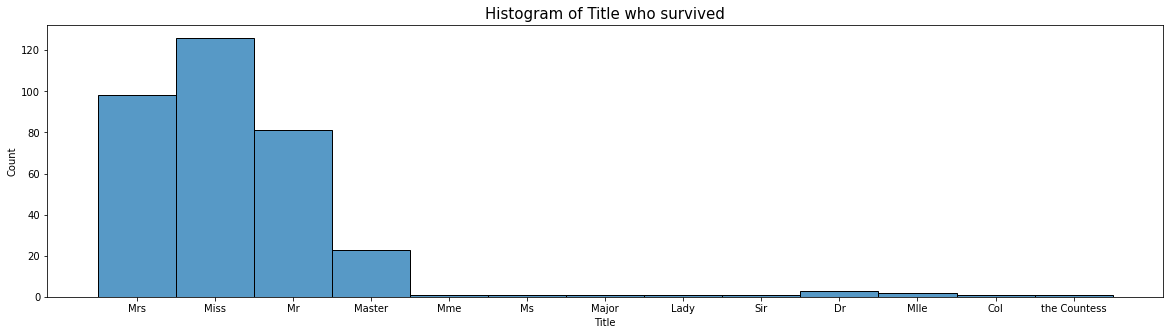

In [62]:
plt.figure(figsize = (20,5))
sns.histplot(title_surv["Title"])
plt.title('Histogram of Title who survived',size=15);

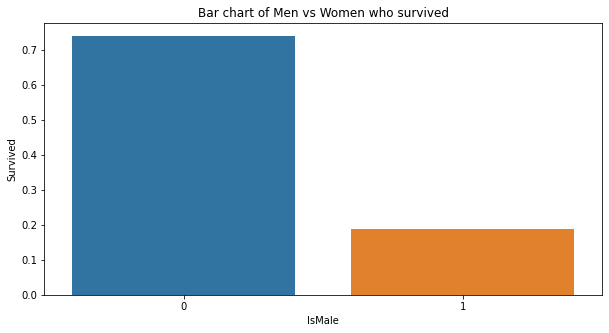

In [63]:
plt.figure(figsize = (10,5))
sns.barplot(x="IsMale",y="Survived", data=df_train, ci=None);
plt.title('Bar chart of Men vs Women who survived');

Most of the survivors were women(more 70% survived rate).

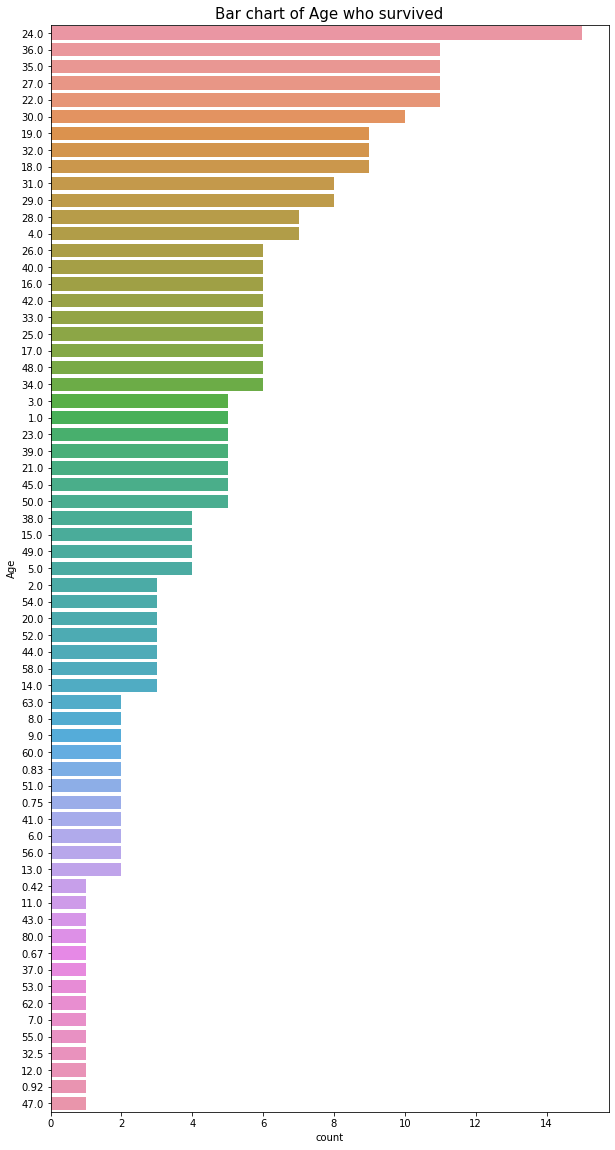

In [64]:
plt.figure(figsize = (10,20))
sns.countplot(y="Age", data=df_train[df_train["Survived"] == 1][["Age"]],\
              order = df_train[df_train["Survived"] == 1]["Age"].value_counts().index)
plt.title('Bar chart of Age who survived',size=15);

The more of survivors are 24, 36,35 27, 22 and 30 years old.

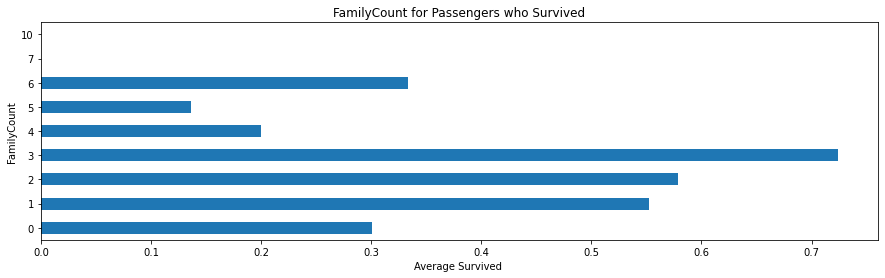

In [65]:
plt.subplots(figsize=(15,4))
df_train.groupby('FamilyCount')['Survived'].mean().plot(kind='barh')
plt.xlabel('Average Survived ')
plt.title('FamilyCount for Passengers who Survived');

Having 3 people family on the boat helps the survival rate but more than 3 people decrease the survival rate.

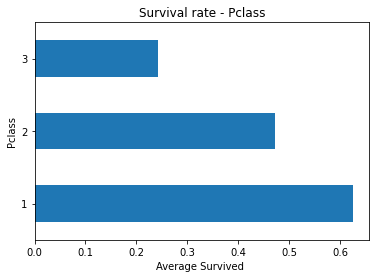

In [66]:
plt.subplots(figsize=(6,4))
df_train.groupby(['Pclass'])['Survived'].mean().plot(kind='barh')
#style
plt.xlabel('Average Survived ')
plt.title('Survival rate - Pclass');

The most survival rate of people buy 1st class.

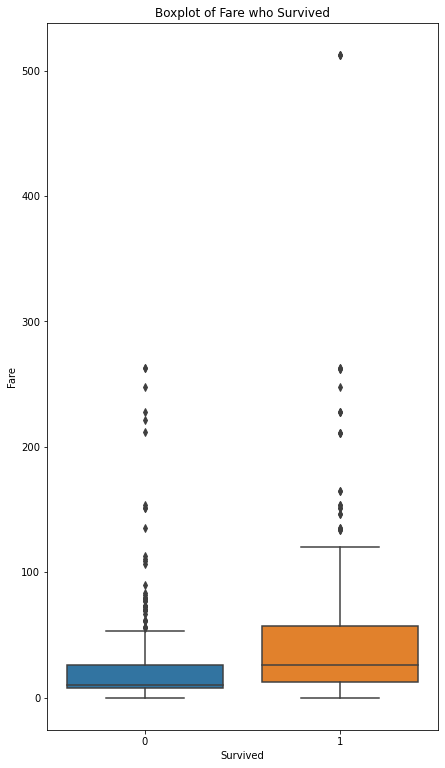

In [67]:
plt.subplots(figsize=(7,13))
sns.boxplot(x="Survived", y= "Fare", data=df_train)
plt.title('Boxplot of Fare who Survived');

Died people are low fare.

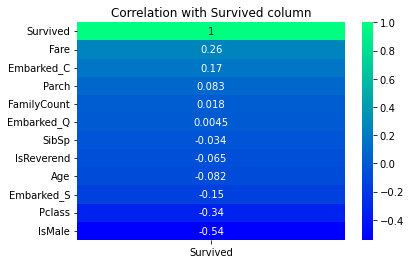

In [68]:
plt.title('Correlation with Survived column')
corr = df_train.corr()[['Survived']].sort_values(by='Survived',ascending=False)
sns.heatmap(corr, annot=True, cmap="winter");

The most Correlation with Survived column is Fare which have Correlation 0.26.